In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import sklearn.linear_model
import sklearn.preprocessing
import statsmodels.api as sm
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
permits = pd.read_csv('permits.csv')
permits.shape

(76892, 17)

In [3]:
permits.Permit_approved = pd.to_datetime(permits.Permit_approved)
permits.Permit_submitted = pd.to_datetime(permits.Permit_submitted)
permits = permits.set_index(permits.Permit_approved).sort_index()

In [4]:
permits.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76892 entries, 2016-01-04 to 2021-12-30
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Permit_approved       76892 non-null  datetime64[ns]
 1   Status_Date           76892 non-null  object        
 2   Status                76892 non-null  int64         
 3   API_NO.               76892 non-null  int64         
 4   Operator_Name_Number  76892 non-null  object        
 5   Lease_Name            76892 non-null  object        
 6   Well                  76892 non-null  object        
 7   District              76892 non-null  object        
 8   County                76892 non-null  object        
 9   Wellbore_Profile      76892 non-null  object        
 10  Filing_Purpose        76892 non-null  object        
 11  Amend                 76892 non-null  object        
 12  Total_Depth           76892 non-null  int64         
 13 

- Approval_time is an object, should be datetime or integer/float

In [5]:
# permits.Approval_time = pd.to_datetime(permits.Approval_time)
# this code won't work bc it's in string format--i resolved by addressing it in the wrangle module

In [6]:
permits.head(1)

,Permit_approved,Status_Date,Status,API_NO.,Operator_Name_Number,Lease_Name,Well,District,County,Wellbore_Profile,Filing_Purpose,Amend,Total_Depth,Current_Queue,Permit_submitted,Approval_time_days,SHALE
Permit_approved,,,,,,,,,,,,,,,,,
2016-01-04,2016-01-04,Submitted 01/04/2016 Approved 01/04/2016,812976,28531642,"CANTERA OPERATING, LLC (129692)",O. A. LAMPLEY GU 1,1,02,LAVACA,Vertical,Recompletion,N,13606,APPROVED,2016-01-04,0,EAGLE FORD


In [7]:
permits.describe()

,Status,API_NO.,Total_Depth,Approval_time_days
count,76892.000000,7.689200e+04,76892.000000,76892.000000
mean,842509.209294,2.950391e+07,9954.407780,12.629870
std,22431.405938,1.289433e+07,3732.362647,33.585786
min,70969.000000,1.008200e+05,150.000000,0.000000
25%,827731.750000,2.253134e+07,8000.000000,3.000000
50%,843171.000000,3.174117e+07,10000.000000,6.000000
75%,858770.250000,3.893654e+07,12000.000000,13.000000
max,875615.000000,7.063026e+07,28010.000000,2989.000000


In [8]:
permits.index.min(), permits.index.max(), permits.index.max()-permits.index.min()

(Timestamp('2016-01-04 00:00:00'),
 Timestamp('2021-12-30 00:00:00'),
 Timedelta('2187 days 00:00:00'))

- from the beginning of 2016 to the end of 2021

In [9]:
permits.Current_Queue.value_counts()

APPROVED    76892
Name: Current_Queue, dtype: int64

- all rows are in approved status

In [10]:
permits.isna().sum()

Permit_approved         0
Status_Date             0
Status                  0
API_NO.                 0
Operator_Name_Number    0
Lease_Name              0
Well                    0
District                0
County                  0
Wellbore_Profile        0
Filing_Purpose          0
Amend                   0
Total_Depth             0
Current_Queue           0
Permit_submitted        0
Approval_time_days      0
SHALE                   0
dtype: int64

- drop Stacked_Lateral_Parent_Well_DP, which is almost all na's
- drop the very few na's in wellbore and shale
#### Done in the wrangle file

In [11]:
permits.Lease_Name.nunique()

30402

- many duplicated lease names, but we are keeping these bc the same lease name can file multiple times for different wells/reasons

In [18]:
permits.County.value_counts()

REEVES           6447
MIDLAND          6393
MARTIN           5401
HOWARD           3913
LOVING           3902
                 ... 
COLLINGSWORTH       1
BRISCOE             1
KINNEY              1
FLOYD               1
BELL                1
Name: County, Length: 220, dtype: int64

In [26]:
len(permits.County.unique())

220

- there are 220 texas counties represented in this data

In [12]:
permits.head(1)

,Permit_approved,Status_Date,Status,API_NO.,Operator_Name_Number,Lease_Name,Well,District,County,Wellbore_Profile,Filing_Purpose,Amend,Total_Depth,Current_Queue,Permit_submitted,Approval_time_days,SHALE
Permit_approved,,,,,,,,,,,,,,,,,
2016-01-04,2016-01-04,Submitted 01/04/2016 Approved 01/04/2016,812976,28531642,"CANTERA OPERATING, LLC (129692)",O. A. LAMPLEY GU 1,1,02,LAVACA,Vertical,Recompletion,N,13606,APPROVED,2016-01-04,0,EAGLE FORD


array([[<AxesSubplot:title={'center':'Permit_approved'}>,
        <AxesSubplot:title={'center':'Status'}>],
       [<AxesSubplot:title={'center':'API_NO.'}>,
        <AxesSubplot:title={'center':'Total_Depth'}>],
       [<AxesSubplot:title={'center':'Permit_submitted'}>,
        <AxesSubplot:title={'center':'Approval_time_days'}>]],
      dtype=object)

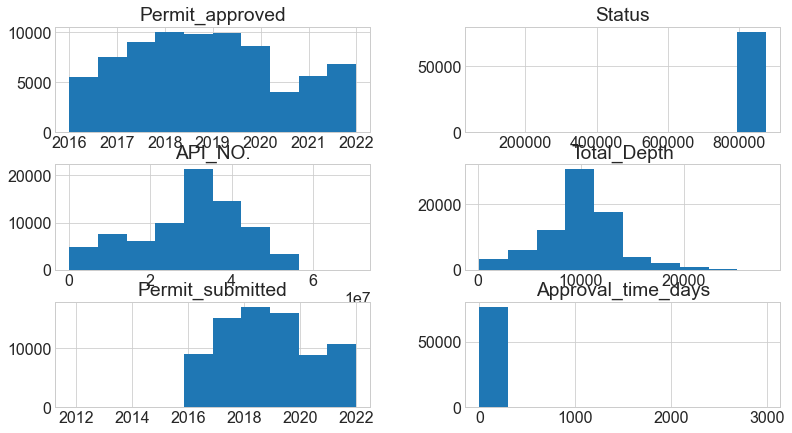

In [13]:
permits.hist()

- well depth is normally distributed
- notice a dropoff in permits in 2020--covid related downturn, for sure
- some of the permits were submitted as early as 2012
- almost all approval times were a matter of a couple of days, with a couple of outliers
- not familiar with the meaning of the status or api number, would be good to investigate

<AxesSubplot:>

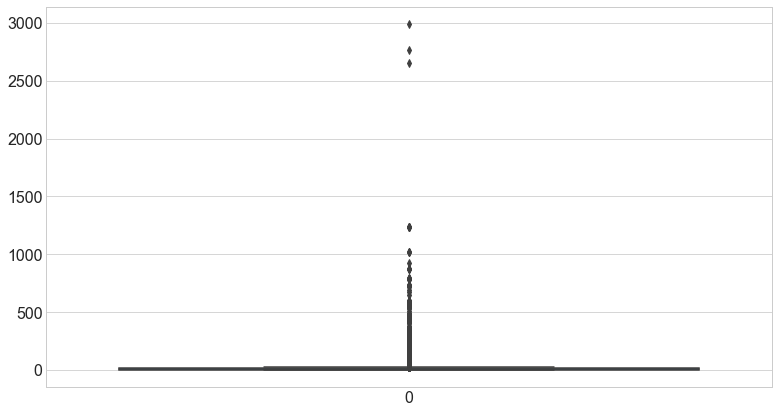

In [15]:
sns.boxplot(data=permits.Approval_time_days)

In [27]:
def remove_outliers(df, k, col_list):
    ''' 
    
    Here, we remove outliers from a list of columns in a dataframe and return that dataframe
    
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

array([[<AxesSubplot:title={'center':'Permit_approved'}>,
        <AxesSubplot:title={'center':'Status'}>],
       [<AxesSubplot:title={'center':'API_NO.'}>,
        <AxesSubplot:title={'center':'Total_Depth'}>],
       [<AxesSubplot:title={'center':'Permit_submitted'}>,
        <AxesSubplot:title={'center':'Approval_time_days'}>]],
      dtype=object)

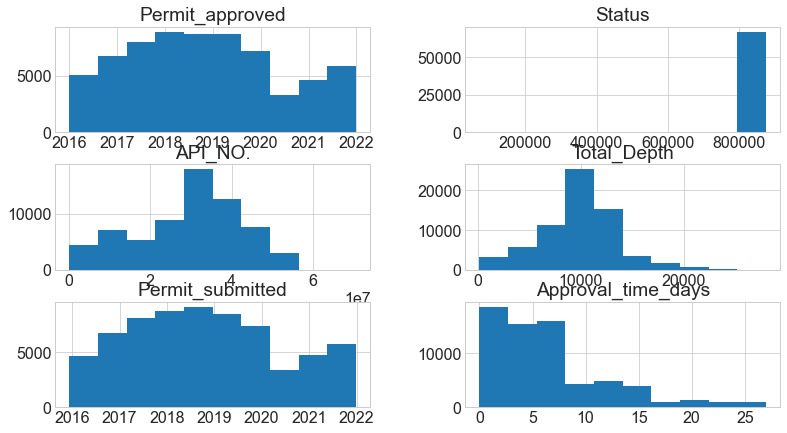

In [29]:
permits = remove_outliers(permits, 1.5, ['Approval_time_days'])
permits.hist()

- the remove outliers feature, which i will implement in the wrangle_module, takes care of those extreme approval times, and hence the early permit submissions

<AxesSubplot:xlabel='Permit_approved'>

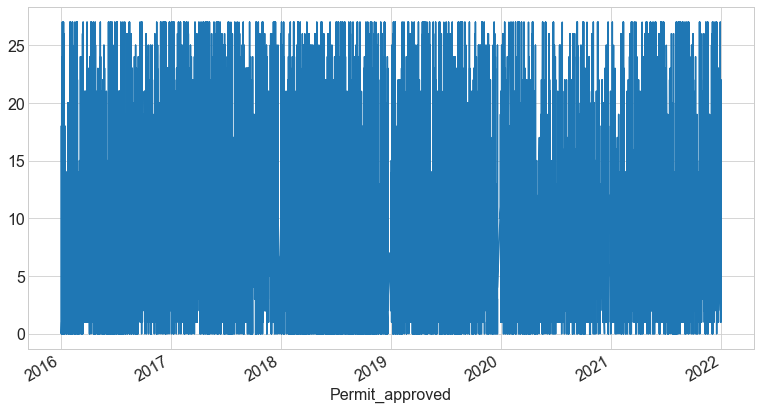

In [30]:
y = permits.Approval_time_days
y.plot()

## Splitting the data here for further explo
- for the time being, i will not pursue the time series analysis perspective and will do a typical split, pending further exploration

In [31]:
def split_permits(df):
    '''
    Takes in the permits dataframe and returns train, validate, test subset dataframes
    '''
    # SPLIT
    # Test set is .2 of original dataframe
    train, test = train_test_split(df, test_size = .2, random_state=123)
    # The remainder is here divided .7 to train and .3 to validate
    train, validate = train_test_split(train, test_size=.3, random_state=123)

    # return train, validate, test

    X_train = train.drop(columns=['Approval_time_days'])
    y_train = pd.DataFrame(train.Approval_time_days, columns=['Approval_time_days'])

    X_validate = validate.drop(columns=['Approval_time_days'])
    y_validate = pd.DataFrame(validate.Approval_time_days, columns=['Approval_time_days'])

    X_test = test.drop(columns=['Approval_time_days'])
    y_test = pd.DataFrame(test.Approval_time_days, columns=['Approval_time_days'])

    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [32]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = \
split_permits(permits)

In [35]:
train.shape, \
validate.shape, \
test.shape, \
X_train.shape, \
y_train.shape, \
X_validate.shape, \
y_validate.shape, \
X_test.shape, \
y_test.shape

((37718, 17),
 (16166, 17),
 (13471, 17),
 (37718, 16),
 (37718, 1),
 (16166, 16),
 (16166, 1),
 (13471, 16),
 (13471, 1))

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37718 entries, 2018-11-07 to 2017-11-03
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Permit_approved       37718 non-null  datetime64[ns]
 1   Status_Date           37718 non-null  object        
 2   Status                37718 non-null  int64         
 3   API_NO.               37718 non-null  int64         
 4   Operator_Name_Number  37718 non-null  object        
 5   Lease_Name            37718 non-null  object        
 6   Well                  37718 non-null  object        
 7   District              37718 non-null  object        
 8   County                37718 non-null  object        
 9   Wellbore_Profile      37718 non-null  object        
 10  Filing_Purpose        37718 non-null  object        
 11  Amend                 37718 non-null  object        
 12  Total_Depth           37718 non-null  int64         
 13 

In [37]:
train.Wellbore_Profile.value_counts()

Horizontal                                   25671
Vertical                                     10562
Directional                                   1110
Vertical, Horizontal                           102
Horizontal, Vertical                            92
Vertical Sidetrack                              56
Directional Sidetrack                           47
Horizontal Sidetrack                            44
Directional, Vertical                           16
Vertical, Directional                           13
Horizontal, Directional                          2
Directional Sidetrack, Vertical Sidetrack        2
Directional, Horizontal                          1
Name: Wellbore_Profile, dtype: int64